# Nicaviz Demo

_By Nicapotato_

In [1]:
%reload_ext autoreload
%autoreload 2
%load_ext watermark

In [2]:
import pandas as pd
import numpy as np
from numpy import random
import nicaviz
import seaborn as sns

sns.set_style("whitegrid")

%watermark 
%watermark --iversions

Last updated: 2021-09-24T10:20:18.516078+01:00

Python implementation: CPython
Python version       : 3.7.7
IPython version      : 7.13.0

Compiler    : Clang 4.0.1 (tags/RELEASE_401/final)
OS          : Darwin
Release     : 19.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 12
Architecture: 64bit

seaborn: 0.10.1
numpy  : 1.18.1
nicaviz: 0.0.6
pandas : 1.2.3



In [3]:
def random_dates(start, end, n=10):

    start_u = start.value//10**9
    end_u = end.value//10**9

    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')

DFLEN = 5000
df = pd.DataFrame({
    'int_small': random.randint(low=0, high=5, size=DFLEN),
    'int_med': random.randint(low=0, high=20, size=DFLEN),
    'str_med': random.choice(["a","b","c","d","e","f","g"], size=DFLEN),
    'str_med_two': random.choice([x for x in "qwerty"], size=DFLEN),
    'str_small': random.choice(["blue","red"], size=DFLEN),
    'bool': random.choice([True,False], size=DFLEN),
    'cont_rand': random.random(size=DFLEN)*10,
    'cont_uni': random.normal(loc=0, scale=1, size=DFLEN)*10,
    'date': pd.date_range(start='1/1/2018', periods=DFLEN),
    'timestamp': random_dates(pd.to_datetime('2018-01-01'), pd.to_datetime('2018-03-01'), n=DFLEN)
    })

display(df.sample(10))

,int_small,int_med,str_med,str_med_two,str_small,bool,cont_rand,cont_uni,date,timestamp
964,2,15,b,w,blue,True,6.755469,6.194928,2020-08-22,2018-02-06 09:01:06
1597,0,18,a,e,blue,False,2.848111,1.535875,2022-05-17,2018-02-06 21:40:41
701,2,14,e,y,blue,True,0.138591,-11.911078,2019-12-03,2018-01-14 14:22:25
3523,4,5,d,r,red,False,6.603276,-3.209540,2027-08-25,2018-01-05 00:35:35
1555,1,7,f,e,red,True,4.377017,-8.416481,2022-04-05,2018-02-09 07:55:19
3294,1,10,b,w,red,False,0.116952,-17.810795,2027-01-08,2018-01-01 03:22:42
3371,1,9,g,e,red,False,3.003563,-9.628645,2027-03-26,2018-01-31 11:40:17
2359,1,16,d,r,blue,False,6.909085,-5.533581,2024-06-17,2018-02-01 04:52:35
3306,4,13,f,w,red,True,2.065147,-3.661788,2027-01-20,2018-02-24 18:17:50
4356,1,3,c,t,blue,True,2.688280,-16.191517,2029-12-05,2018-01-29 07:54:23


In [4]:
df.head()

,int_small,int_med,str_med,str_med_two,str_small,bool,cont_rand,cont_uni,date,timestamp
0,2,15,a,r,blue,False,6.308657,-0.469065,2018-01-01,2018-02-03 06:56:21
1,2,19,b,r,blue,False,6.857139,0.346946,2018-01-02,2018-02-17 13:20:30
2,0,4,g,q,red,True,9.465669,8.949683,2018-01-03,2018-01-17 17:15:11
3,1,10,b,q,blue,True,9.145836,7.489678,2018-01-04,2018-01-19 07:09:54
4,2,1,d,t,red,False,6.102119,0.085796,2018-01-05,2018-01-07 14:42:44


In [5]:
df.nica.categorical_describe()

Dataframe Dimension: 5000 Rows, 10 Columns


,Unique,Missing,dtype,ValCount 1,Occ,ValCount 2,Occ,ValCount 3,Occ,ValCount 4,Occ,ValCount 5,Occ
Column,,,,,,,,,,,,,
int_small,5,0,int64,4,1032,0,1003,2,998.0,3,992.0,1,975.0
int_med,20,0,int64,18,276,6,273,19,268.0,16,268.0,7,266.0
str_med,7,0,object,d,732,c,729,f,727.0,a,719.0,b,717.0
str_med_two,6,0,object,r,866,w,864,e,825.0,y,822.0,q,819.0
str_small,2,0,object,red,2615,blue,2385,NaN,NaN,NaN,NaN,NaN,NaN
bool,2,0,bool,True,2562,False,2438,NaN,NaN,NaN,NaN,NaN,NaN
cont_rand,5000,0,float64,7.665335,1,7.080946,1,9.032719,1.0,6.278147,1.0,7.414478,1.0
cont_uni,5000,0,float64,-17.378593,1,6.459372,1,9.075271,1.0,3.53855,1.0,11.143705,1.0
date,5000,0,datetime64[ns],2026-04-30 00:00:00,1,2020-10-31 00:00:00,1,2021-09-28 00:00:00,1.0,2030-04-04 00:00:00,1.0,2025-12-02 00:00:00,1.0


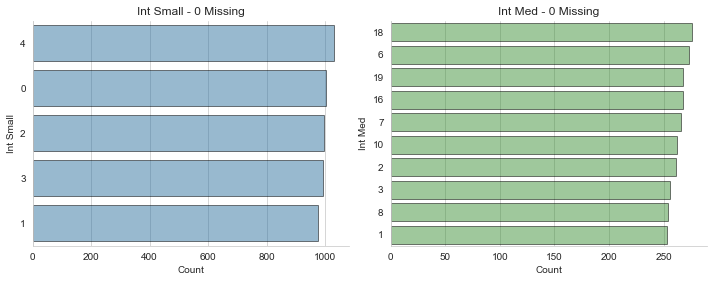

In [6]:
df.nica.mass_plot(
    plt_set= ["int_small", "int_med"],
    plottype = "countplot")

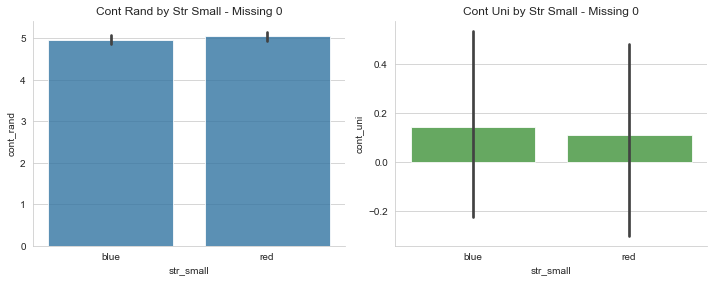

In [7]:
df.nica.mass_plot(
    plt_set= ["cont_rand", "cont_uni"],
    x_var = "str_small",
    plottype = "bar")

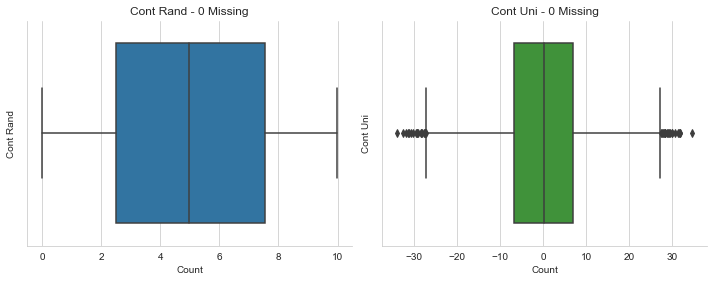

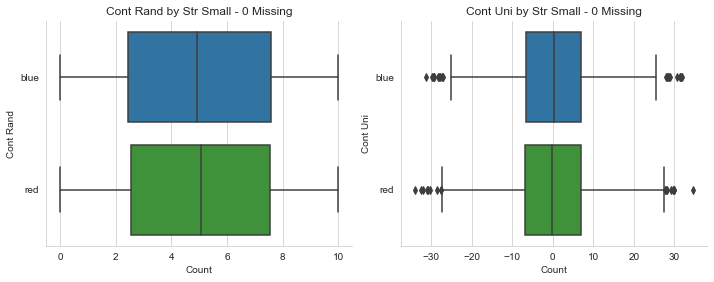

In [8]:
df.nica.mass_plot(
    plt_set= ["cont_rand", "cont_uni"],
    plottype = "boxplot")

df.nica.mass_plot(
    plt_set= ["cont_rand", "cont_uni"],
    hue = "str_small",
    plottype = "boxplot")

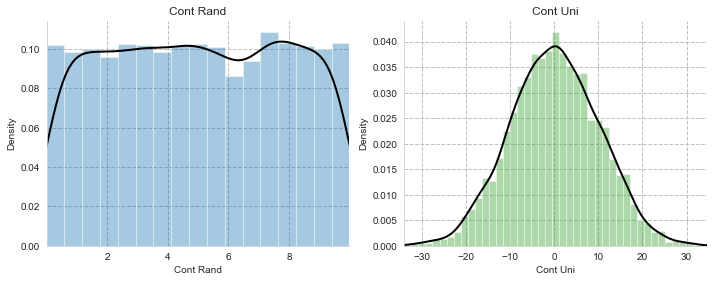

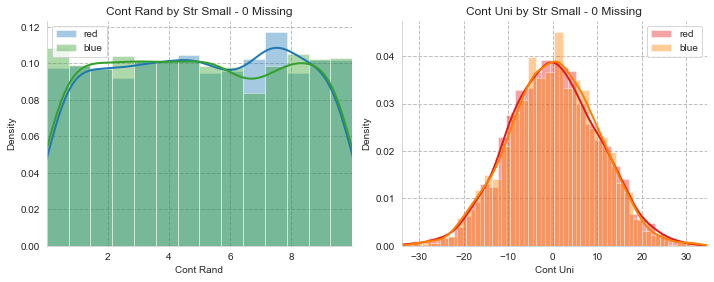

In [9]:
df.nica.mass_plot(
    plt_set= ["cont_rand", "cont_uni"],
    plottype = "distplot")

df.nica.mass_plot(
    plt_set= ["cont_rand", "cont_uni"],
    hue = "str_small",
    plottype = "distplot")

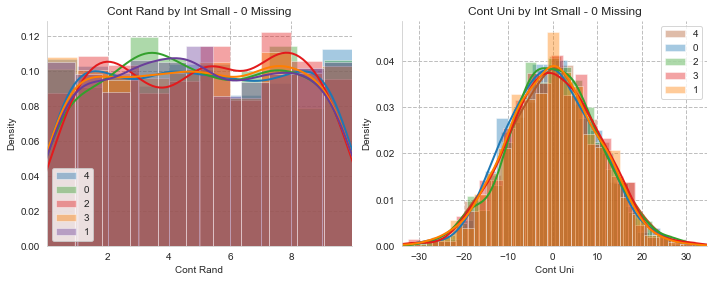

In [10]:
df.nica.mass_plot(
    plt_set= ["cont_rand", "cont_uni"],
    hue = "int_small",
    plottype = "distplot")

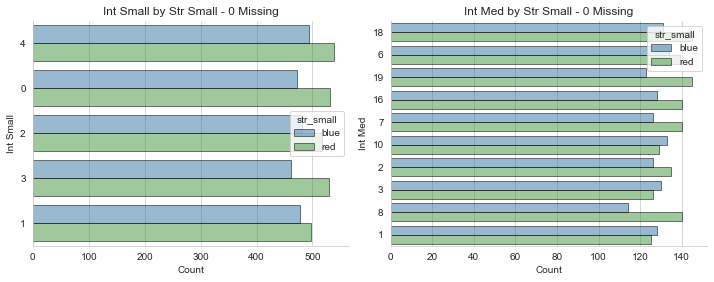

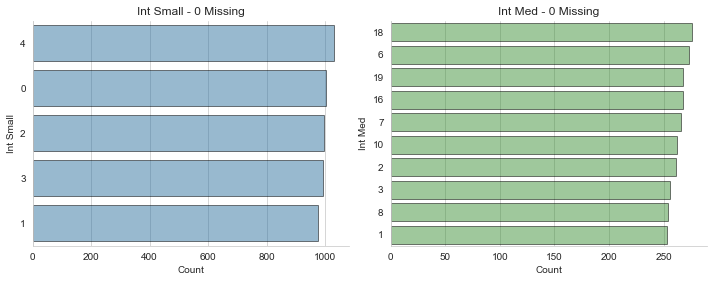

In [11]:
df.nica.mass_plot(
    plt_set= ["int_small", "int_med"],
    hue = "str_small",
    plottype = "countplot")

df.nica.mass_plot(
    plt_set= ["int_small", "int_med"],
    plottype = "countplot")

### Time Series

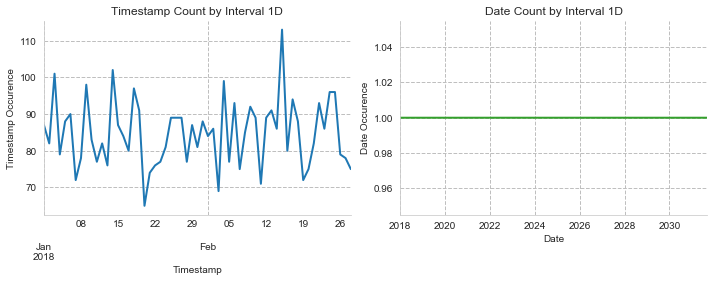

In [12]:
df.nica.mass_plot(
    plt_set= ["timestamp", "date"],
    plottype = "ts_resample",
    resample=True,
    resample_interval="1D"
)

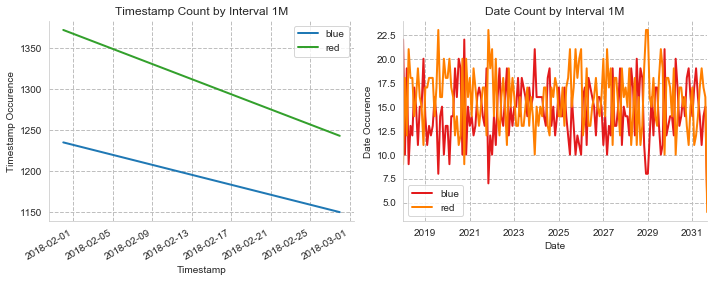

In [13]:
df.nica.mass_plot(
    plt_set= ["timestamp", "date"],
    plottype = "ts_resample",
    resample=True,
    hue = "str_small",
    resample_interval="1M"
)

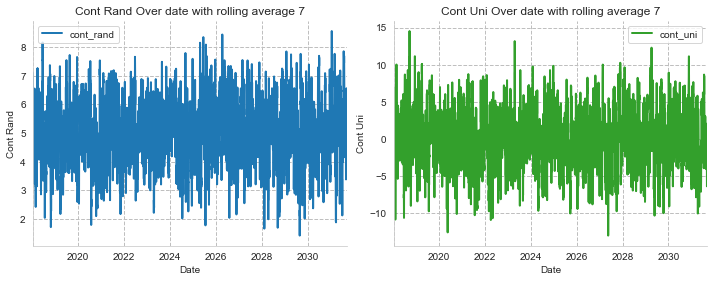

In [14]:
df.nica.mass_plot(
    plt_set= ["cont_rand", "cont_uni"],
    plottype = "ts_rolling",
    x_var="date",
    rolling=True,
    r=7
)

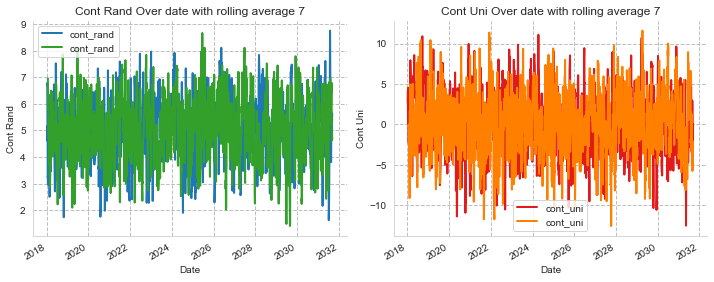

In [15]:
df.nica.mass_plot(
    plt_set= ["cont_rand", "cont_uni"],
    plottype = "ts_rolling",
    hue = "str_small",
    x_var="date",
    rolling=True,
    r=7
)

### WordClouds

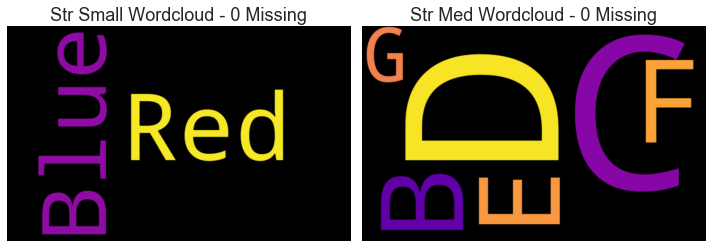

In [16]:
df.nica.mass_plot(
    plt_set= ["str_small", "str_med"],
    plottype = "wordcloud")

### Rank Correlations

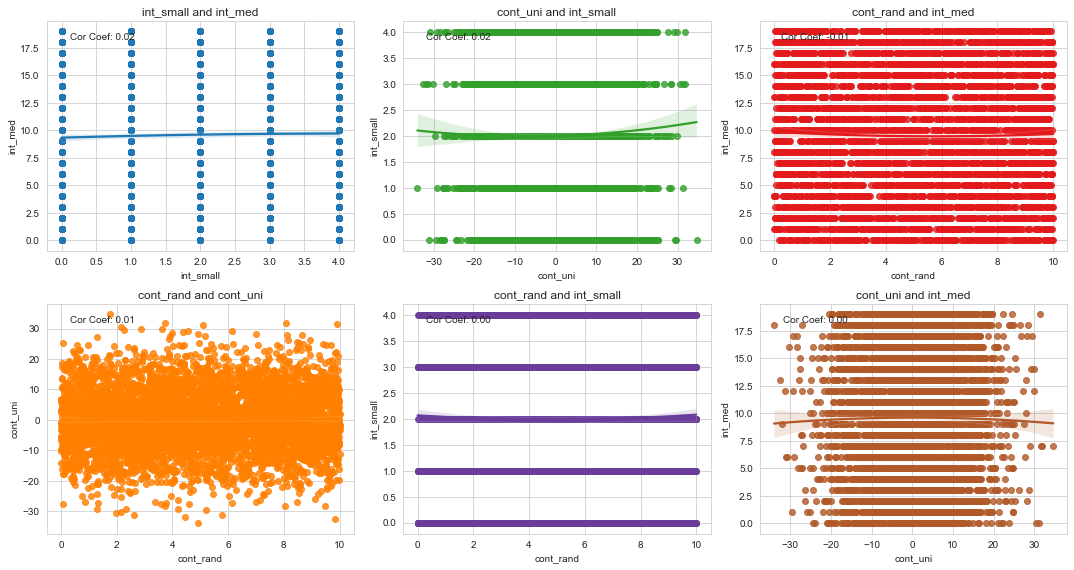

In [17]:
df.nica.rank_correlations_plots(["cont_rand", "cont_uni", "int_small", "int_med"], 9)

### Pivot Heatmaps

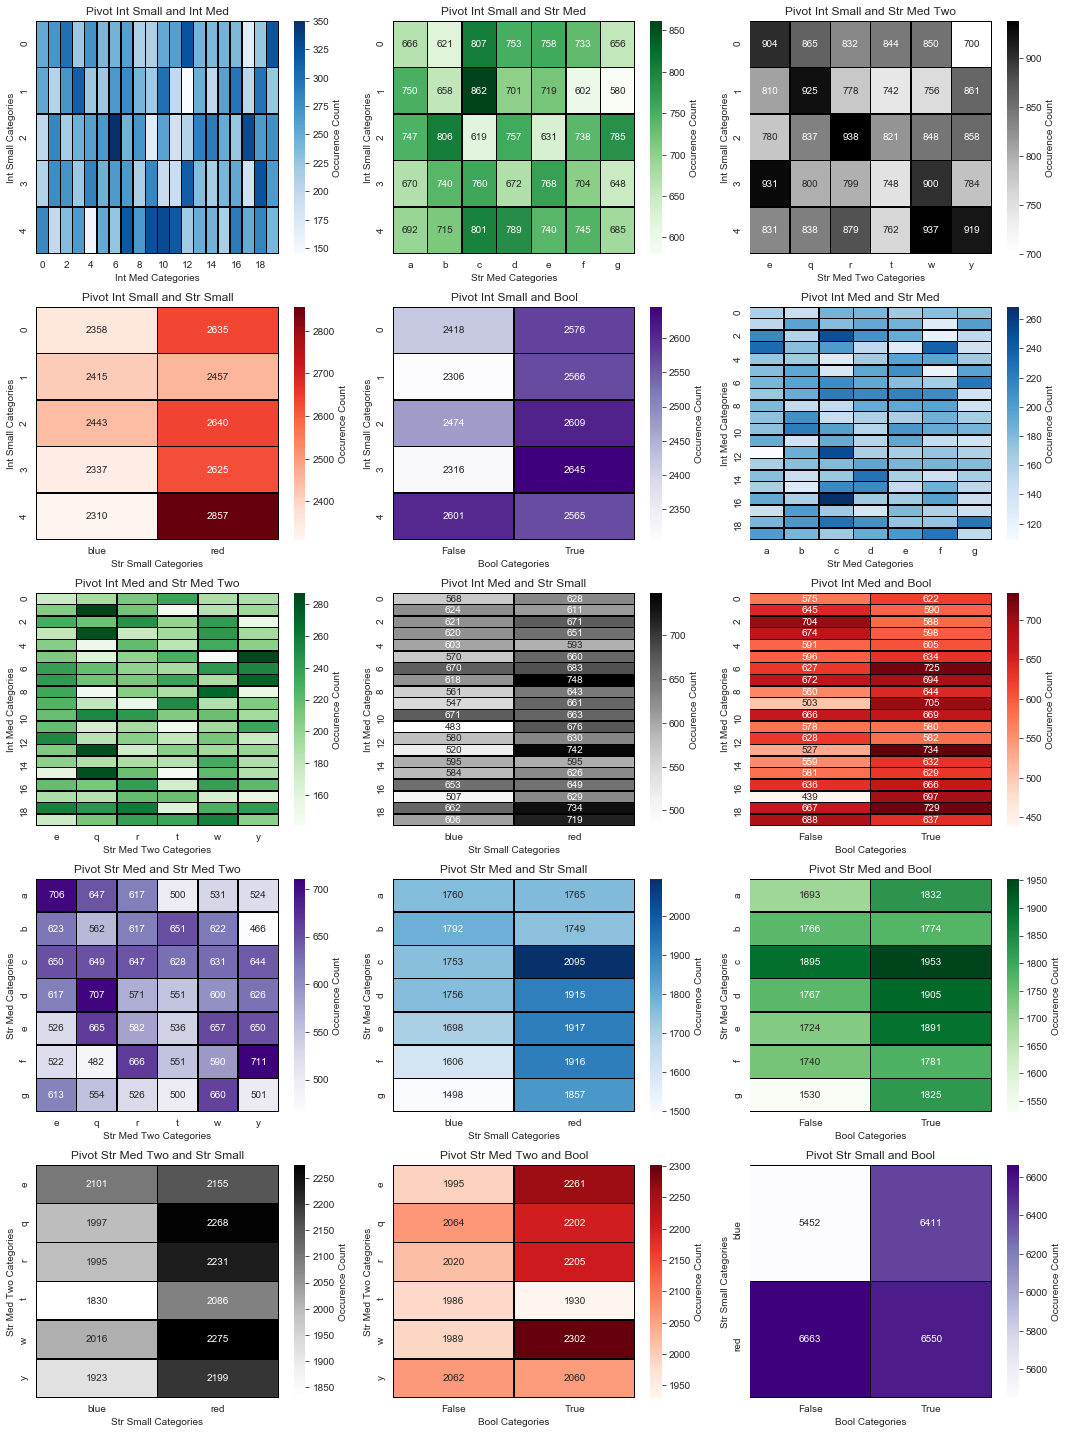

In [18]:
categorical = ['int_small', 'int_med', 'str_med', 'str_med_two', 'str_small', 'bool']
df.nica.pivot_plots(categorical, "cont_rand", np.sum)

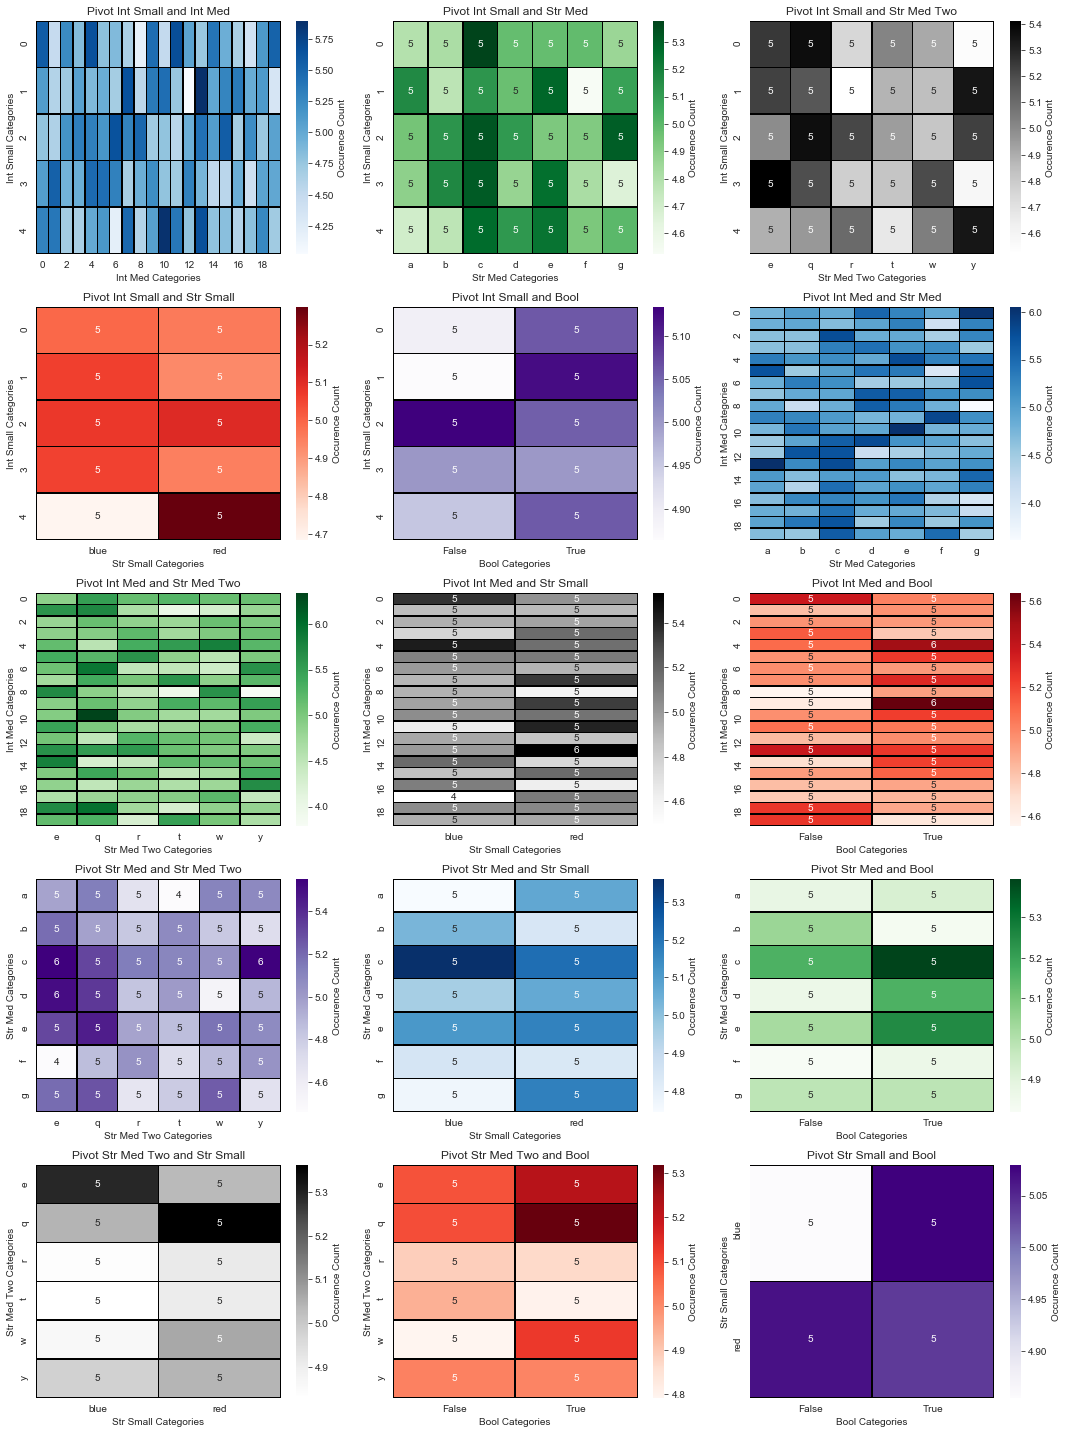

In [19]:
df.nica.pivot_plots(categorical, "cont_rand", np.mean)